In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')



In [4]:
"""
Deleting the columns not required for determining the survival of a person
"""

del train['PassengerId']
del train['Ticket']
del train['Fare']
del train['Cabin']
del train['Name']

In [5]:
"""Since there are ONLY 2 rows whose Embarked data is not known, 
therefore we can neglect those 2 rows as they will not make much of a difference"""


"""
Similarly, deleting the columns not required for determining the survival of a person for the data stored in test.csv
"""

del test['Ticket']
del test['Fare']
del test['Cabin']
del test['Name']

In [6]:
def getNum(str):
    if str=='male':
        return '1'
    if str=='female':
        return '2'
train["Gender"]=train["Sex"].apply(getNum)
#We have created a new column called "Gender" and 
#filling it with values 1 ,2 based on the values of sex column
train.head()

test["Gender"]=test["Sex"].apply(getNum)
#We have created a new column called "Gender" and 
#filling it with values 1 ,2 based on the values of sex column

In [7]:
del train['Sex']
del test['Sex']

In [8]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=True)


,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [9]:
train[['Gender','Survived']].groupby(['Gender']).mean().sort_values(by='Survived',ascending=True)

,Survived
Gender,
1,0.188908
2,0.742038


In [10]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=True)

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


In [11]:
train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=True)

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


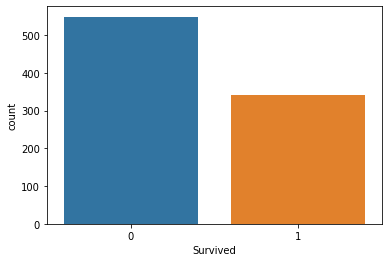

In [12]:
sns.countplot(train['Survived'])


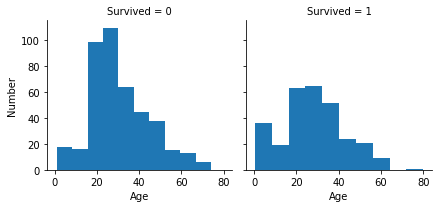

In [13]:
age_hist = sns.FacetGrid(train, col='Survived')
age_hist.map(plt.hist, 'Age')
age_hist.set_ylabels('Number')

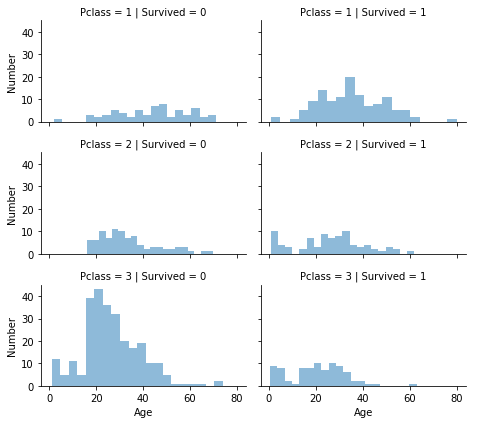

In [14]:
pclass_age_grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.0, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_age_grid.add_legend()
pclass_age_grid.set_ylabels('Number')

In [15]:
#finding mean survived age
mean_sur= train[train.Survived==1]['Age'].mean()
mean_sur

# Finding the mean age of "Not Survived" people
mean_nsur=train[train['Survived']==0]['Age'].mean()
mean_nsur

30.62617924528302

In [16]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
    
    
train["Age"].isnull().sum()

0

In [17]:

#Renaming "gender" column
train.rename(columns={'Gender':'Sex'}, inplace=True)

test.rename(columns={'Gender':'Sex'}, inplace=True)

#Removing the 2 rows having null value for Embarked column
train.dropna(inplace=True)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,0,3,22,1,0,S,1
1,1,1,38,1,0,C,2
2,1,3,26,0,0,S,2
3,1,1,35,1,0,S,2
4,0,3,35,0,0,S,1


In [18]:
#Combining 'Parch' & 'SibSp' as 'Realtives'
train['Family_Members']=train['Parch']+train['SibSp'] + 1
test['Family_Members']=test['Parch']+test['SibSp'] + 1

del train['SibSp']
del train['Parch']

del test['SibSp']
del test['Parch']

In [19]:
data=[train,test]

for dataset in data:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 37), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 45 , 'Age'] = 6

train['Age'].value_counts()

4    159
2    158
3    151
1    150
5    107
6    100
0     64
Name: Age, dtype: int64

In [20]:
data=[train,test]

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map({'C': 0, 'S': 1, 'Q': 2}).astype(int)
    
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,2,1,1,2
1,1,1,5,0,2,2
2,1,3,3,1,2,1
3,1,1,4,1,2,2
4,0,3,4,1,1,1


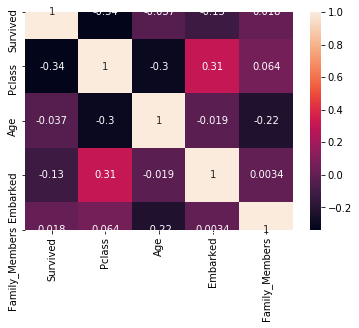

In [21]:
sns.heatmap(train.corr(), annot=True)

In [22]:
X_train= train.drop(['Survived'], axis =1)
y_train= train['Survived']

X_test=test.drop('PassengerId', axis=1).copy()
X_test.shape

(418, 5)

## NEURAL-NETWORKS (KERAS)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(test)
X_test=test.drop('PassengerId', axis=1).copy()
X_test.head()


,Pclass,Age,Embarked,Sex,Family_Members
0,3,2,2,1,1
1,3,5,1,2,2
2,2,3,2,1,1
3,3,4,1,1,1
4,3,4,1,2,3


In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras import backend as K
X_train = K.cast_to_floatx(X_train)
y_train = K.cast_to_floatx(y_train)

X_test = K.cast_to_floatx(X_test)


Using TensorFlow backend.


In [25]:
model = Sequential()


In [26]:
# Input layer with 5 neurons
model.add(Dense(10, activation = 'relu', input_dim = 5))
#Hidden layer
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))

#output layer with 1 output neuron which will predict 1 or 0
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [28]:
import keras.callbacks
from tensorflow.keras.callbacks import EarlyStopping


In [29]:
#train model
model.fit(X_train, y_train, validation_split=0.2, epochs=800)

Epoch 1/800
23/23 [==============================] - 1s 23ms/step - loss: 0.7171 - accuracy: 0.6104 - val_loss: 0.6940 - val_accuracy: 0.6461
Epoch 2/800
23/23 [==============================] - 0s 6ms/step - loss: 0.6773 - accuracy: 0.6104 - val_loss: 0.6592 - val_accuracy: 0.6461
Epoch 3/800
23/23 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.6104 - val_loss: 0.6298 - val_accuracy: 0.6461
Epoch 4/800
23/23 [==============================] - 0s 5ms/step - loss: 0.6252 - accuracy: 0.6104 - val_loss: 0.5877 - val_accuracy: 0.6461
Epoch 5/800
23/23 [==============================] - 0s 5ms/step - loss: 0.5943 - accuracy: 0.6104 - val_loss: 0.5547 - val_accuracy: 0.6461
Epoch 6/800
23/23 [==============================] - 0s 6ms/step - loss: 0.5732 - accuracy: 0.6104 - val_loss: 0.5325 - val_accuracy: 0.6461
Epoch 7/800
23/23 [==============================] - 0s 7ms/step - loss: 0.5607 - accuracy: 0.6104 - val_loss: 0.5192 - val_accuracy: 0.6461
Epoch 8/800


Epoch 59/800
23/23 [==============================] - 0s 6ms/step - loss: 0.4673 - accuracy: 0.8158 - val_loss: 0.4098 - val_accuracy: 0.8427
Epoch 60/800
23/23 [==============================] - 0s 6ms/step - loss: 0.4675 - accuracy: 0.8087 - val_loss: 0.4055 - val_accuracy: 0.8427
Epoch 61/800
23/23 [==============================] - 0s 5ms/step - loss: 0.4656 - accuracy: 0.8087 - val_loss: 0.4060 - val_accuracy: 0.8371
Epoch 62/800
23/23 [==============================] - 0s 5ms/step - loss: 0.4635 - accuracy: 0.8115 - val_loss: 0.4023 - val_accuracy: 0.8371
Epoch 63/800
23/23 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8101 - val_loss: 0.4044 - val_accuracy: 0.8483
Epoch 64/800
23/23 [==============================] - 0s 7ms/step - loss: 0.4636 - accuracy: 0.8158 - val_loss: 0.4034 - val_accuracy: 0.8427
Epoch 65/800
23/23 [==============================] - 0s 6ms/step - loss: 0.4616 - accuracy: 0.8115 - val_loss: 0.4001 - val_accuracy: 0.8315
Epoch 

23/23 [==============================] - 0s 5ms/step - loss: 0.4330 - accuracy: 0.8284 - val_loss: 0.3670 - val_accuracy: 0.8652
Epoch 117/800
23/23 [==============================] - 0s 5ms/step - loss: 0.4318 - accuracy: 0.8228 - val_loss: 0.3665 - val_accuracy: 0.8483
Epoch 118/800
23/23 [==============================] - 0s 6ms/step - loss: 0.4318 - accuracy: 0.8270 - val_loss: 0.3655 - val_accuracy: 0.8539
Epoch 119/800
23/23 [==============================] - 0s 5ms/step - loss: 0.4353 - accuracy: 0.8172 - val_loss: 0.3631 - val_accuracy: 0.8539
Epoch 120/800
23/23 [==============================] - 0s 6ms/step - loss: 0.4318 - accuracy: 0.8214 - val_loss: 0.3646 - val_accuracy: 0.8539
Epoch 121/800
23/23 [==============================] - 0s 7ms/step - loss: 0.4304 - accuracy: 0.8256 - val_loss: 0.3640 - val_accuracy: 0.8539
Epoch 122/800
23/23 [==============================] - 0s 6ms/step - loss: 0.4344 - accuracy: 0.8200 - val_loss: 0.3678 - val_accuracy: 0.8596
Epoch 123/800

23/23 [==============================] - 0s 5ms/step - loss: 0.3982 - accuracy: 0.8354 - val_loss: 0.3580 - val_accuracy: 0.8483
Epoch 174/800
23/23 [==============================] - 0s 5ms/step - loss: 0.4027 - accuracy: 0.8368 - val_loss: 0.3550 - val_accuracy: 0.8596
Epoch 175/800
23/23 [==============================] - 0s 6ms/step - loss: 0.4008 - accuracy: 0.8326 - val_loss: 0.3539 - val_accuracy: 0.8539
Epoch 176/800
23/23 [==============================] - 0s 6ms/step - loss: 0.4007 - accuracy: 0.8326 - val_loss: 0.3560 - val_accuracy: 0.8539
Epoch 177/800
23/23 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.8354 - val_loss: 0.3557 - val_accuracy: 0.8539
Epoch 178/800
23/23 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.8340 - val_loss: 0.3523 - val_accuracy: 0.8596
Epoch 179/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3980 - accuracy: 0.8340 - val_loss: 0.3530 - val_accuracy: 0.8596
Epoch 180/800

23/23 [==============================] - 0s 6ms/step - loss: 0.3868 - accuracy: 0.8397 - val_loss: 0.3553 - val_accuracy: 0.8596
Epoch 231/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3936 - accuracy: 0.8425 - val_loss: 0.3572 - val_accuracy: 0.8539
Epoch 232/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3944 - accuracy: 0.8284 - val_loss: 0.3527 - val_accuracy: 0.8652
Epoch 233/800
23/23 [==============================] - 0s 7ms/step - loss: 0.3867 - accuracy: 0.8383 - val_loss: 0.3517 - val_accuracy: 0.8596
Epoch 234/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3851 - accuracy: 0.8453 - val_loss: 0.3533 - val_accuracy: 0.8652
Epoch 235/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3855 - accuracy: 0.8397 - val_loss: 0.3507 - val_accuracy: 0.8596
Epoch 236/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3847 - accuracy: 0.8425 - val_loss: 0.3526 - val_accuracy: 0.8596
Epoch 237/800

23/23 [==============================] - 0s 6ms/step - loss: 0.3777 - accuracy: 0.8383 - val_loss: 0.3543 - val_accuracy: 0.8652
Epoch 288/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3800 - accuracy: 0.8383 - val_loss: 0.3541 - val_accuracy: 0.8596
Epoch 289/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3783 - accuracy: 0.8397 - val_loss: 0.3557 - val_accuracy: 0.8708
Epoch 290/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3851 - accuracy: 0.8425 - val_loss: 0.3596 - val_accuracy: 0.8652
Epoch 291/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3773 - accuracy: 0.8439 - val_loss: 0.3546 - val_accuracy: 0.8539
Epoch 292/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3797 - accuracy: 0.8397 - val_loss: 0.3541 - val_accuracy: 0.8652
Epoch 293/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3799 - accuracy: 0.8425 - val_loss: 0.3580 - val_accuracy: 0.8483
Epoch 294/800

23/23 [==============================] - 0s 5ms/step - loss: 0.3768 - accuracy: 0.8383 - val_loss: 0.3624 - val_accuracy: 0.8539
Epoch 345/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3751 - accuracy: 0.8368 - val_loss: 0.3570 - val_accuracy: 0.8596
Epoch 346/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3763 - accuracy: 0.8368 - val_loss: 0.3621 - val_accuracy: 0.8596
Epoch 347/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3753 - accuracy: 0.8397 - val_loss: 0.3580 - val_accuracy: 0.8652
Epoch 348/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3784 - accuracy: 0.8411 - val_loss: 0.3618 - val_accuracy: 0.8483
Epoch 349/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3750 - accuracy: 0.8481 - val_loss: 0.3559 - val_accuracy: 0.8596
Epoch 350/800
23/23 [==============================] - 0s 7ms/step - loss: 0.3772 - accuracy: 0.8354 - val_loss: 0.3592 - val_accuracy: 0.8652
Epoch 351/800

23/23 [==============================] - 0s 5ms/step - loss: 0.3747 - accuracy: 0.8453 - val_loss: 0.3624 - val_accuracy: 0.8539
Epoch 402/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3746 - accuracy: 0.8425 - val_loss: 0.3647 - val_accuracy: 0.8427
Epoch 403/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3720 - accuracy: 0.8481 - val_loss: 0.3587 - val_accuracy: 0.8539
Epoch 404/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3788 - accuracy: 0.8425 - val_loss: 0.3605 - val_accuracy: 0.8539
Epoch 405/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3720 - accuracy: 0.8467 - val_loss: 0.3636 - val_accuracy: 0.8652
Epoch 406/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3781 - accuracy: 0.8397 - val_loss: 0.3615 - val_accuracy: 0.8652
Epoch 407/800
23/23 [==============================] - 0s 7ms/step - loss: 0.3738 - accuracy: 0.8495 - val_loss: 0.3645 - val_accuracy: 0.8427
Epoch 408/800

23/23 [==============================] - 0s 5ms/step - loss: 0.3737 - accuracy: 0.8397 - val_loss: 0.3658 - val_accuracy: 0.8315
Epoch 459/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3740 - accuracy: 0.8397 - val_loss: 0.3667 - val_accuracy: 0.8596
Epoch 460/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3729 - accuracy: 0.8326 - val_loss: 0.3625 - val_accuracy: 0.8539
Epoch 461/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3753 - accuracy: 0.8397 - val_loss: 0.3655 - val_accuracy: 0.8427
Epoch 462/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3718 - accuracy: 0.8397 - val_loss: 0.3677 - val_accuracy: 0.8315
Epoch 463/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3718 - accuracy: 0.8425 - val_loss: 0.3628 - val_accuracy: 0.8652
Epoch 464/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3713 - accuracy: 0.8439 - val_loss: 0.3678 - val_accuracy: 0.8315
Epoch 465/800

23/23 [==============================] - 0s 4ms/step - loss: 0.3711 - accuracy: 0.8397 - val_loss: 0.3657 - val_accuracy: 0.8596
Epoch 516/800
23/23 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8425 - val_loss: 0.3675 - val_accuracy: 0.8427
Epoch 517/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3719 - accuracy: 0.8354 - val_loss: 0.3689 - val_accuracy: 0.8539
Epoch 518/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3718 - accuracy: 0.8354 - val_loss: 0.3682 - val_accuracy: 0.8315
Epoch 519/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3739 - accuracy: 0.8383 - val_loss: 0.3668 - val_accuracy: 0.8708
Epoch 520/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3710 - accuracy: 0.8481 - val_loss: 0.3686 - val_accuracy: 0.8315
Epoch 521/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3716 - accuracy: 0.8411 - val_loss: 0.3658 - val_accuracy: 0.8596
Epoch 522/800

23/23 [==============================] - 0s 5ms/step - loss: 0.3809 - accuracy: 0.8340 - val_loss: 0.3681 - val_accuracy: 0.8483
Epoch 573/800
23/23 [==============================] - 0s 7ms/step - loss: 0.3743 - accuracy: 0.8411 - val_loss: 0.3751 - val_accuracy: 0.8539
Epoch 574/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3716 - accuracy: 0.8481 - val_loss: 0.3733 - val_accuracy: 0.8483
Epoch 575/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3672 - accuracy: 0.8565 - val_loss: 0.3697 - val_accuracy: 0.8427
Epoch 576/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3674 - accuracy: 0.8425 - val_loss: 0.3677 - val_accuracy: 0.8596
Epoch 577/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3703 - accuracy: 0.8397 - val_loss: 0.3665 - val_accuracy: 0.8483
Epoch 578/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3705 - accuracy: 0.8453 - val_loss: 0.3652 - val_accuracy: 0.8539
Epoch 579/800

23/23 [==============================] - 0s 5ms/step - loss: 0.3751 - accuracy: 0.8439 - val_loss: 0.3728 - val_accuracy: 0.8539
Epoch 630/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3845 - accuracy: 0.8383 - val_loss: 0.3756 - val_accuracy: 0.8596
Epoch 631/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3697 - accuracy: 0.8411 - val_loss: 0.3897 - val_accuracy: 0.8202
Epoch 632/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3717 - accuracy: 0.8383 - val_loss: 0.3713 - val_accuracy: 0.8539
Epoch 633/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3679 - accuracy: 0.8368 - val_loss: 0.3726 - val_accuracy: 0.8315
Epoch 634/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.8397 - val_loss: 0.3695 - val_accuracy: 0.8539
Epoch 635/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3708 - accuracy: 0.8439 - val_loss: 0.3729 - val_accuracy: 0.8315
Epoch 636/800

23/23 [==============================] - 0s 6ms/step - loss: 0.3660 - accuracy: 0.8411 - val_loss: 0.3735 - val_accuracy: 0.8539
Epoch 687/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3712 - accuracy: 0.8383 - val_loss: 0.3763 - val_accuracy: 0.8315
Epoch 688/800
23/23 [==============================] - 0s 7ms/step - loss: 0.3703 - accuracy: 0.8439 - val_loss: 0.3750 - val_accuracy: 0.8483
Epoch 689/800
23/23 [==============================] - 0s 7ms/step - loss: 0.3675 - accuracy: 0.8453 - val_loss: 0.3722 - val_accuracy: 0.8483
Epoch 690/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3661 - accuracy: 0.8495 - val_loss: 0.3720 - val_accuracy: 0.8483
Epoch 691/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3662 - accuracy: 0.8383 - val_loss: 0.3708 - val_accuracy: 0.8483
Epoch 692/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3674 - accuracy: 0.8453 - val_loss: 0.3718 - val_accuracy: 0.8483
Epoch 693/800

23/23 [==============================] - 0s 5ms/step - loss: 0.3679 - accuracy: 0.8425 - val_loss: 0.3769 - val_accuracy: 0.8596
Epoch 744/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3687 - accuracy: 0.8397 - val_loss: 0.3810 - val_accuracy: 0.8539
Epoch 745/800
23/23 [==============================] - 0s 5ms/step - loss: 0.3661 - accuracy: 0.8453 - val_loss: 0.3843 - val_accuracy: 0.8371
Epoch 746/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.8439 - val_loss: 0.3788 - val_accuracy: 0.8539
Epoch 747/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3706 - accuracy: 0.8368 - val_loss: 0.3796 - val_accuracy: 0.8539
Epoch 748/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3682 - accuracy: 0.8425 - val_loss: 0.3815 - val_accuracy: 0.8427
Epoch 749/800
23/23 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.8509 - val_loss: 0.3809 - val_accuracy: 0.8371
Epoch 750/800

23/23 [==============================] - 0s 6ms/step - loss: 0.3615 - accuracy: 0.8397 - val_loss: 0.3794 - val_accuracy: 0.8427


In [30]:
#getting predictions of test data
prediction = model.predict(X_test)

y_final = (prediction >= 0.5).astype(int).reshape(X_test.shape[0])

output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_final})
output.to_csv('prediction.csv', index=False)

